# Week 6 Practice

## Financial Time Series

### Data Import via yfinance

Install the yfinance package, which is the downloader connected with the Yahoo Fiannce API.

In [8]:
pip install pathlib #you might need this packge

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install yfinance==0.2.28

Note: you may need to restart the kernel to use updated packages.


In [10]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

Download the data and save it as a pandas DataFrame.

In [3]:
# data=pd.read_csv("C:/Users/yueya/OneDrive - University of Westminster/2023-24/CMF/VOD.L.csv")

In [11]:
initial_data = yf.download("AAPL AMZN FB GOOG MSFT TSLA SPY ^VIX", start="2021-03-01", end="2022-03-01")

[*********************100%%**********************]  8 of 8 completed


1 Failed download:
['FB']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [5]:
initial_data.head()

Adj Close                                          \
                           AAPL        AMZN  FB        GOOG        MSFT   
Date                                                                      
2021-03-01 00:00:00  125.925598  157.307007 NaN  104.075500  231.744019   
2021-03-02 00:00:00  123.294563  154.726501 NaN  103.792000  228.741333   
2021-03-03 00:00:00  120.279198  150.250000 NaN  101.335503  222.569687   
2021-03-04 00:00:00  118.377357  148.878494 NaN  102.454498  221.757889   
2021-03-05 00:00:00  119.648529  150.022995 NaN  105.427002  226.521103   

                                                         Close              \
                            SPY        TSLA   ^VIX        AAPL        AMZN   
Date                                                                         
2021-03-01 00:00:00  374.164764  239.476669  23.35  127.790001  157.307007   
2021-03-02 00:00:00  371.245087  228.813339  24.10  125.120003  154.726501   
2021-03-03 00:00:00  366.327667  217.733337  26.67  122.059998  150.250000   
2021-03-04 00:00:00  361.794434  207.146667  28.57  120.129997  148.878494   
2021-03-05 00:00:00  368.450226  199.316666  24.66  121.419998  150.022995   

                     ...        Open                Volume                 \
                     ...        TSLA       ^VIX       AAPL       AMZN  FB   
Date                 ...                                                    
2021-03-01 00:00:00  ...  230.036667  25.200001  116307900   54582000 NaN   
2021-03-02 00:00:00  ...  239.426666  23.580000  102260900   51916000 NaN   
2021-03-03 00:00:00  ...  229.330002  22.799999  112966300   79774000 NaN   
2021-03-04 00:00:00  ...  218.600006  26.520000  178155000  109632000 NaN   
2021-03-05 00:00:00  ...  208.686661  29.480000  153766600  107772000 NaN   

                                                                    
                         GOOG      MSFT        SPY       TSLA ^VIX  
Date                                                                
2021-03-01 00:00:00  28090000  25324000  105348800   81408600    0  
2021-03-02 00:00:00  22692000  22812500   79595300   71196600    0  
2021-03-03 00:00:00  29684000  34029500  119940200   90624000    0  
2021-03-04 00:00:00  42360000  44727800  183433000  197758500    0  
2021-03-05 00:00:00  43904000  41872800  152039600  268189500    0  

[5 rows x 48 columns]

In [12]:
initial_data['Adj Close'].head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2021-03-01 00:00:00,125.925598,157.307007,NaN,104.075500,231.744019,374.164764,239.476669,23.35
2021-03-02 00:00:00,123.294556,154.726501,NaN,103.792000,228.741318,371.244995,228.813339,24.10
2021-03-03 00:00:00,120.279205,150.250000,NaN,101.335503,222.569702,366.327667,217.733337,26.67
2021-03-04 00:00:00,118.377365,148.878494,NaN,102.454498,221.757904,361.794464,207.146667,28.57
2021-03-05 00:00:00,119.648529,150.022995,NaN,105.427002,226.521118,368.450195,199.316666,24.66


Set the Adj Closed data as a new DataFrame we will use.

In [27]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 2021-03-01 00:00:00 to 2022-02-28 00:00:00
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    253 non-null    float64
 1   AMZN    253 non-null    float64
 2   FB      0 non-null      float64
 3   GOOG    253 non-null    float64
 4   MSFT    253 non-null    float64
 5   SPY     253 non-null    float64
 6   TSLA    253 non-null    float64
 7   ^VIX    253 non-null    float64
dtypes: float64(8)
memory usage: 17.8+ KB


In [14]:
data.head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2021-03-01 00:00:00,125.925598,157.307007,NaN,104.075500,231.744019,374.164764,239.476669,23.35
2021-03-02 00:00:00,123.294556,154.726501,NaN,103.792000,228.741318,371.244995,228.813339,24.10
2021-03-03 00:00:00,120.279205,150.250000,NaN,101.335503,222.569702,366.327667,217.733337,26.67
2021-03-04 00:00:00,118.377365,148.878494,NaN,102.454498,221.757904,361.794464,207.146667,28.57
2021-03-05 00:00:00,119.648529,150.022995,NaN,105.427002,226.521118,368.450195,199.316666,24.66


In [15]:
data.tail()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2022-02-22 00:00:00,162.885040,150.197495,NaN,129.402496,283.702667,418.071899,273.843323,28.809999
2022-02-23 00:00:00,158.672165,144.826996,NaN,127.584999,276.356659,410.655914,254.679993,31.020000
2022-02-24 00:00:00,161.318832,151.358002,NaN,132.673492,290.476746,416.835907,266.923340,30.320000
2022-02-25 00:00:00,163.410400,153.788498,NaN,134.519501,293.158752,426.032959,269.956665,27.590000
2022-02-28 00:00:00,163.678055,153.563004,NaN,134.891006,294.618042,424.942963,290.143341,30.150000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

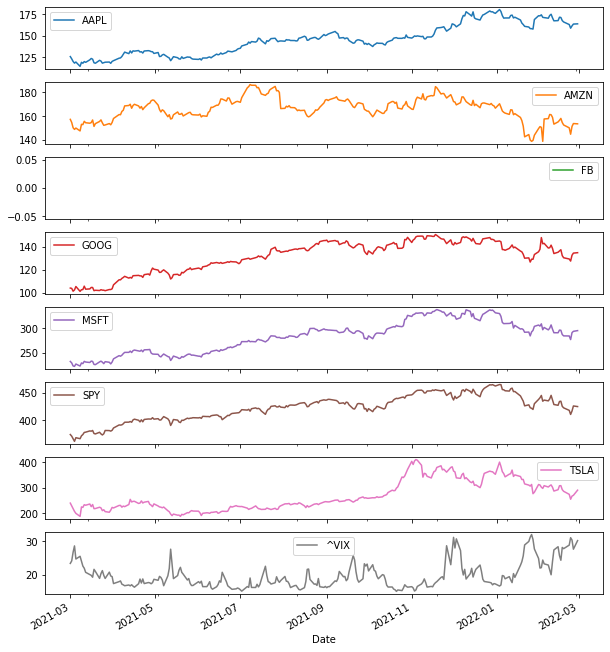

In [16]:
data.plot(figsize=(10, 12), subplots=True)

### Summary Statistics

In [17]:
data.describe().round(2)

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
count,253.00,253.00,0.0,253.00,253.00,253.00,253.00,253.00
mean,145.03,166.10,NaN,131.49,281.71,422.35,266.96,19.74
std,17.32,9.49,NaN,13.81,32.38,23.82,58.32,3.85
min,114.66,138.85,NaN,101.21,221.76,361.79,187.67,15.01
25%,130.09,161.05,NaN,121.06,252.32,404.38,222.69,16.95
50%,144.87,166.78,NaN,136.18,285.56,424.65,244.70,18.63
75%,158.64,172.41,NaN,142.65,302.75,439.45,310.42,21.34
max,180.19,186.57,NaN,150.71,337.62,464.92,409.97,31.96


### Changes over Time

There are multiple options to calculate the changes in a time series over time, including absolute differences, percentage changes, and logarithmic (log) returns.

First, the absolute differences, for which pandas provides a special method:

In [18]:
data.diff().head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2021-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-02 00:00:00,-2.631042,-2.580505,NaN,-0.283501,-3.002701,-2.919769,-10.663330,0.75
2021-03-03 00:00:00,-3.015350,-4.476501,NaN,-2.456497,-6.171616,-4.917328,-11.080002,2.57
2021-03-04 00:00:00,-1.901840,-1.371506,NaN,1.118996,-0.811798,-4.533203,-10.586670,1.90
2021-03-05 00:00:00,1.271164,1.144501,NaN,2.972504,4.763214,6.655731,-7.830002,-3.91


In [19]:
data.diff().describe().round(2)

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
count,252.00,252.00,0.0,252.00,252.00,252.00,252.00,252.00
mean,0.15,-0.01,NaN,0.12,0.25,0.20,0.20,0.03
std,2.27,3.00,NaN,2.03,4.10,3.72,10.38,1.83
min,-6.97,-13.62,NaN,-6.76,-13.25,-10.46,-46.48,-5.66
25%,-1.17,-1.58,NaN,-0.81,-1.69,-1.81,-4.87,-0.95
50%,0.14,-0.02,NaN,0.26,0.05,0.47,0.33,-0.14
75%,1.57,1.70,NaN,1.13,2.95,2.45,4.93,0.96
max,11.00,18.79,NaN,10.16,14.12,10.42,47.67,10.04


From a statistics point of view, absolute changes are not optimal because they are dependent on the scale of the time series data itself. Therefore, percentage changes are usually preferred. The following code derives the percentage changes or percentage returns (also: simple returns) in a financial context and visualizes their mean values per column:

In [20]:
data.pct_change().round(4).head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2021-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-02 00:00:00,-0.0209,-0.0164,NaN,-0.0027,-0.0130,-0.0078,-0.0445,0.0321
2021-03-03 00:00:00,-0.0245,-0.0289,NaN,-0.0237,-0.0270,-0.0132,-0.0484,0.1066
2021-03-04 00:00:00,-0.0158,-0.0091,NaN,0.0110,-0.0036,-0.0124,-0.0486,0.0712
2021-03-05 00:00:00,0.0107,0.0077,NaN,0.0290,0.0215,0.0184,-0.0378,-0.1369


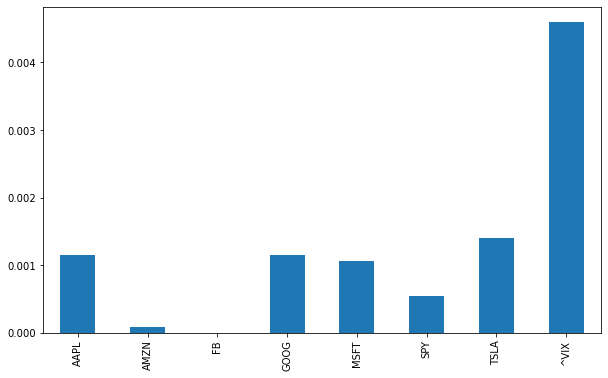

In [21]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

As an alternative to percentage returns, log returns can be used. In some scenarios, they are easier to handle and therefore often preferred in a financial context.

In [22]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2021-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-02 00:00:00,-0.0211,-0.0165,NaN,-0.0027,-0.0130,-0.0078,-0.0455,0.0316
2021-03-03 00:00:00,-0.0248,-0.0294,NaN,-0.0240,-0.0274,-0.0133,-0.0496,0.1013
2021-03-04 00:00:00,-0.0159,-0.0092,NaN,0.0110,-0.0037,-0.0125,-0.0498,0.0688
2021-03-05 00:00:00,0.0107,0.0077,NaN,0.0286,0.0213,0.0182,-0.0385,-0.1472


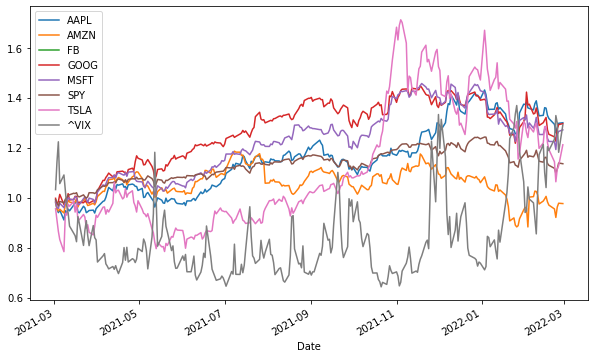

In [23]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

### Resampling

Resampling is an important operation on financial time series data. Usually this takes the form of downsampling, meaning that, for example, a tick data series is resampled to one-minute intervals or a time series with daily observations is resampled to one with weekly or monthly observations

In [25]:
data.resample('1w', label='right').last().head()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

Now we got an error, specifically, it is the 'TypeError'. We have to check the data type of the index for 'data'.

In [29]:
type(data.index)

pandas.core.indexes.base.Index

In [31]:
data.index = pd.to_datetime(data.index)
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [32]:
data.resample('1w', label='right').last().head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2021-03-07,119.648529,150.022995,NaN,105.427002,226.521118,368.450195,199.316666,24.660000
2021-03-14,119.264229,154.474503,NaN,103.096001,230.580109,378.467529,231.243332,20.690001
2021-03-21,118.239395,153.748001,NaN,102.160004,225.298523,375.293945,218.289993,20.950001
2021-03-28,119.441612,152.601501,NaN,101.777496,231.294083,381.557068,206.236664,18.860001
2021-04-04,121.205482,158.050003,NaN,106.887497,237.035385,386.018494,220.583328,17.330000


In [33]:
data.resample('1m', label='right').last().head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2021-03-31,120.367897,154.703995,NaN,103.431503,230.599655,381.894379,222.643326,19.400000
2021-04-30,129.542068,173.371002,NaN,120.505997,246.649811,402.100586,236.479996,18.610001
2021-05-31,123.000565,161.153503,NaN,120.578003,244.768509,404.740845,208.406662,16.760000
2021-06-30,135.191025,172.007996,NaN,125.316002,265.571045,413.818085,226.566666,15.830000
2021-07-31,143.976105,166.379501,NaN,135.220993,279.305542,423.920441,229.066666,18.240000


In [34]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

We got the same TypeError. So it is likely that the data type of index for 'rets' is not DatetimeIndex, TimedeltaIndex or PeriodIndex either.

In [35]:
rets.index = pd.to_datetime(rets.index)
type(rets.index)

pandas.core.indexes.datetimes.DatetimeIndex

<AxesSubplot:xlabel='Date'>

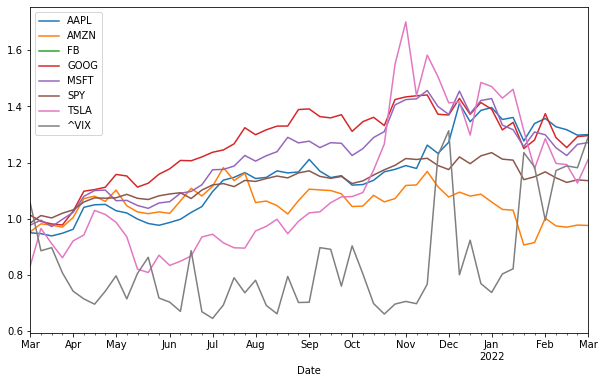

In [36]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

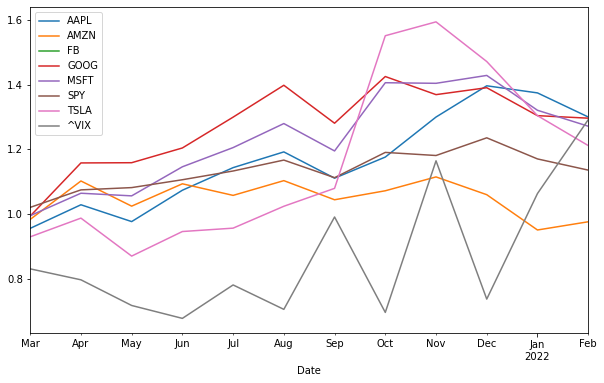

In [37]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

### Rolling Statistics

It is financial tradition to work with rolling statistics, often also called financial indicators or financial studies. Such rolling statistics are basic tools for financial chartists and technical traders, for example. This section works with a single
financial time series only:

In [38]:
sym = 'AAPL'
AAPL_data = pd.DataFrame(data[sym]).dropna()
AAPL_data.tail()

,AAPL
Date,
2022-02-22,162.885040
2022-02-23,158.672165
2022-02-24,161.318832
2022-02-25,163.410400
2022-02-28,163.678055


In [68]:
window = 10
AAPL_data['min'] = data[sym].rolling(window=window).min()   #the rolling minimum.
AAPL_data['mean'] = data[sym].rolling(window=window).mean()
AAPL_data['std'] = data[sym].rolling(window=window).std()
AAPL_data['median'] = data[sym].rolling(window=window).median()
AAPL_data['max'] = data[sym].rolling(window=window).max()
AAPL_data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
AAPL_data.dropna().head()

,AAPL,min,mean,std,median,max,ewma,SMA1,SMA2,positions
Date,,,,,,,,,,
2021-05-24,125.458405,121.184319,124.051810,1.430823,124.046879,125.803879,125.123971,126.503118,124.912620,1
2021-05-25,125.260994,121.184319,124.149532,1.480920,124.224552,125.803879,125.226738,126.144703,124.901544,1
2021-05-26,125.211624,123.079552,124.552262,1.077638,124.925377,125.803879,125.215403,125.823727,124.933495,1
2021-05-27,123.661911,123.079552,124.582861,1.043705,124.925377,125.803879,124.050284,125.430192,124.989873,1
2021-05-28,123.000565,123.000565,124.302529,1.055715,124.224552,125.665680,123.262994,125.103117,125.066927,1


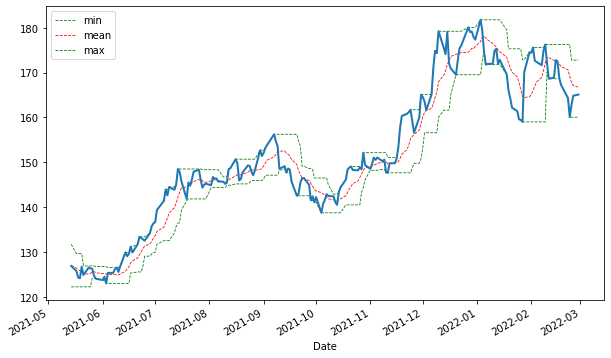

In [23]:
ax = AAPL_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

Rolling statistics are a major tool in the so-called technical analysis of stocks, as compared to the fundamental analysis which focuses, for instance, on financial reports and the strategic positions of the company whose stock is being analysed.

A decades-old trading strategy based on technical analysis is using two simple moving averages (SMAs). The idea is that the trader should go long on a stock (or financial instrument in general) when the shorter-term SMA is above the longer-term SMA and should go short when the opposite holds true. The concepts can be made precise with pandas and the capabilities of the DataFrame
object.

Rolling statistics are generally only calculated when there is enough data given the window parameter specification.

In [40]:
AAPL_data['SMA1'] = data[sym].rolling(window=20).mean()
AAPL_data['SMA2'] = data[sym].rolling(window=60).mean()
AAPL_data[[sym, 'SMA1', 'SMA2']].tail()

,AAPL,SMA1,SMA2
Date,,,
2022-02-22,162.885040,168.320932,169.527662
2022-02-23,158.672165,168.345383,169.584818
2022-02-24,161.318832,168.506623,169.629489
2022-02-25,163.410400,168.795705,169.625530
2022-02-28,163.678055,168.548223,169.634777


<AxesSubplot:xlabel='Date'>

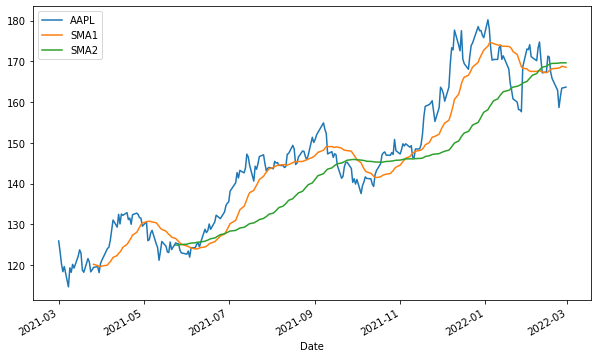

In [41]:
AAPL_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

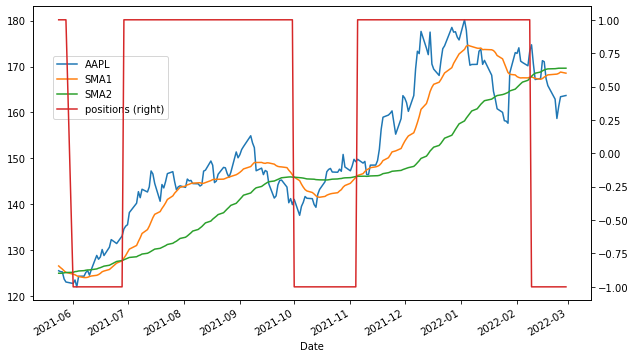

In [45]:
AAPL_data.dropna(inplace=True)
AAPL_data['positions'] = np.where(AAPL_data['SMA1'] > AAPL_data['SMA2'],1,-1)
ax = AAPL_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

### Correlation Analysis

As a further illustration of how to work with pandas and financial time series data, consider the case of the S&P 500 stock index and the VIX volatility index.

It is a stylized fact that when the S&P 500 rises, the VIX falls in general, and vice versa. This is about correlation and not causation. This section shows how to come up with some supporting statistical evidence for the stylized fact that the S&P 500 and the VIX are (highly) negatively correlated.

In [46]:
Corr_data = data[['SPY', '^VIX']].dropna()
Corr_data.tail()

,SPY,^VIX
Date,,
2022-02-22,418.071899,28.809999
2022-02-23,410.655914,31.020000
2022-02-24,416.835907,30.320000
2022-02-25,426.032959,27.590000
2022-02-28,424.942963,30.150000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

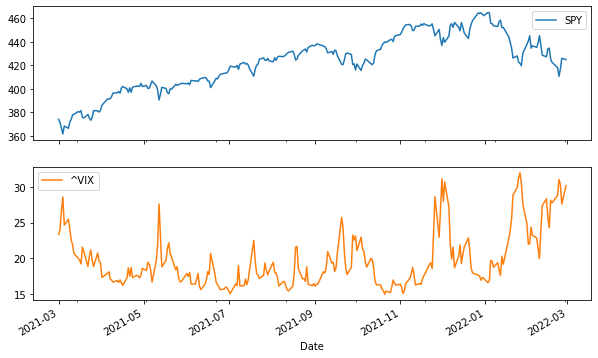

In [50]:
Corr_data.plot(subplots=True, figsize=(10, 6))

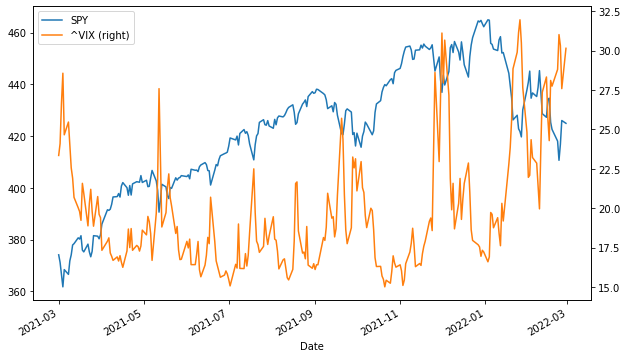

In [51]:
Corr_data.loc['2020-01-01':].plot(secondary_y='^VIX', figsize=(10, 6));

#### Logarithmic Returns

As pointed out earlier, statistical analysis in general relies on returns instead of absolute changes or even absolute values. Therefore, we’ll calculate log returns first before any further analysis takes place.

In [54]:
sprets = np.log(Corr_data / Corr_data.shift(1))
sprets.head()

,SPY,^VIX
Date,,
2021-03-01,NaN,NaN
2021-03-02,-0.007834,0.031615
2021-03-03,-0.013334,0.101327
2021-03-04,-0.012452,0.068818
2021-03-05,0.018229,-0.147175


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

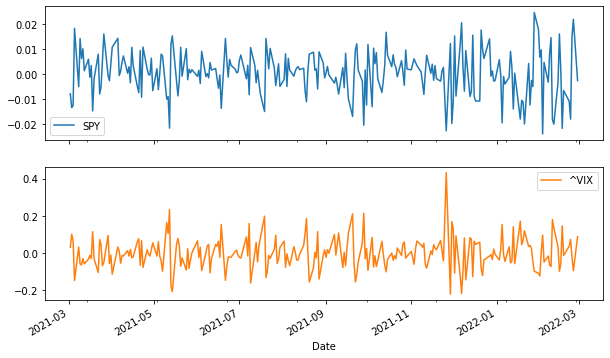

In [55]:
sprets.dropna(inplace=True)  #If True: the removing is done on the current DataFrame. 
#If False: returns a copy where the removing is done.
sprets.plot(subplots=True, figsize=(10, 6))

In such a context, the pandas scatter_matrix() plotting function comes in handy for visualizations. It plots the log returns of the two series against each other, and one can add either a histogram or a kernel density estimator (KDE) on the diagonal:

array([[<AxesSubplot:xlabel='SPY', ylabel='SPY'>,
        <AxesSubplot:xlabel='^VIX', ylabel='SPY'>],
       [<AxesSubplot:xlabel='SPY', ylabel='^VIX'>,
        <AxesSubplot:xlabel='^VIX', ylabel='^VIX'>]], dtype=object)

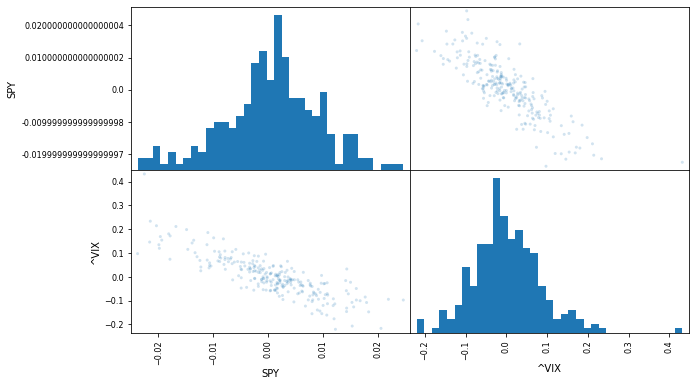

In [58]:
pd.plotting.scatter_matrix(sprets, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6))

#### OLS Regression

With all these preparations, an ordinary least-squares (OLS) regression analysis is convenient to implement.

array([-8.02360278e+00,  5.06611599e-03])

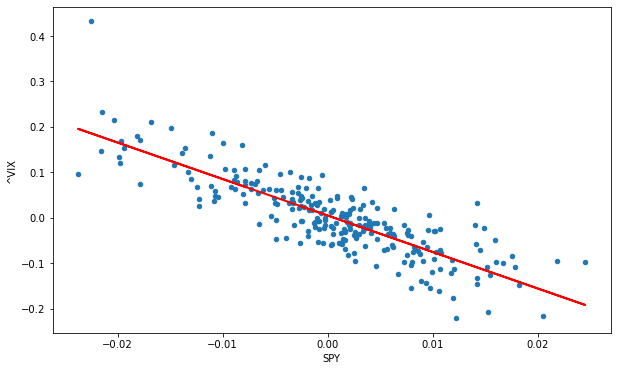

In [64]:
reg = np.polyfit(sprets['SPY'], sprets['^VIX'], deg=1) # Least squares polynomial fit. 'deg': the exponent of the indep variable
# Returns a vector of coefficients p that minimises the squared error 
ax = sprets.plot(kind='scatter', x='SPY', y='^VIX', figsize=(10, 6))
ax.plot(sprets['SPY'], np.polyval(reg, sprets['SPY']), 'r', lw=2); 
# np.polyval(p,x): Evaluate a polynomial at specific values. 'p' are parameters; 'x' are data (i.e. independent variables);
reg

#### Correlation

Finally, we consider correlation measures directly. Two such measures are considered: a static one taking into account the complete data set and a rolling one showing the correlation for a fixed window over time.

In [65]:
sprets.corr()

,SPY,^VIX
SPY,1.000000,-0.839677
^VIX,-0.839677,1.000000


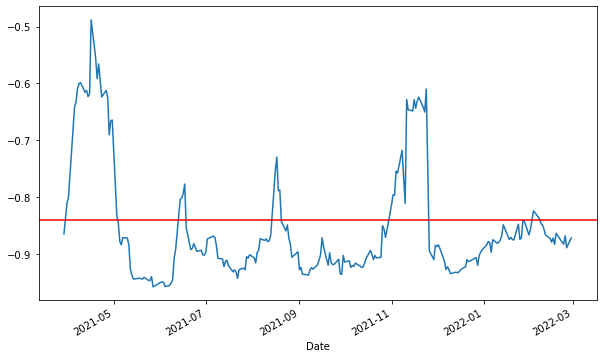

In [67]:
ax = sprets['SPY'].rolling(window=20).corr(sprets['^VIX']).plot(figsize=(10, 6))  #The rolling correlation.
ax.axhline(sprets.corr().iloc[0, 1], c='r');